
=== Activation Function: LINEAR ===
Input: [0 0], Output: -0.2778
Input: [0 1], Output: 0.2500
Input: [1 0], Output: 0.2778
Input: [1 1], Output: 0.8056

=== Activation Function: SIGMOID ===
Input: [0 0], Output: 0.0002
Input: [0 1], Output: 0.0488
Input: [1 0], Output: 0.0490
Input: [1 1], Output: 0.9329

=== Activation Function: TANH ===
Input: [0 0], Output: -0.3121
Input: [0 1], Output: 0.2837
Input: [1 0], Output: 0.3121
Input: [1 1], Output: 0.7341

=== Activation Function: RELU ===
Input: [0 0], Output: 0.0000
Input: [0 1], Output: 0.0000
Input: [1 0], Output: 0.0000
Input: [1 1], Output: 1.0000

=== Activation Function: SOFTMAX ===
Input: [0 0], Output: 0.1353
Input: [0 1], Output: 0.2293
Input: [1 0], Output: 0.2358
Input: [1 1], Output: 0.3997


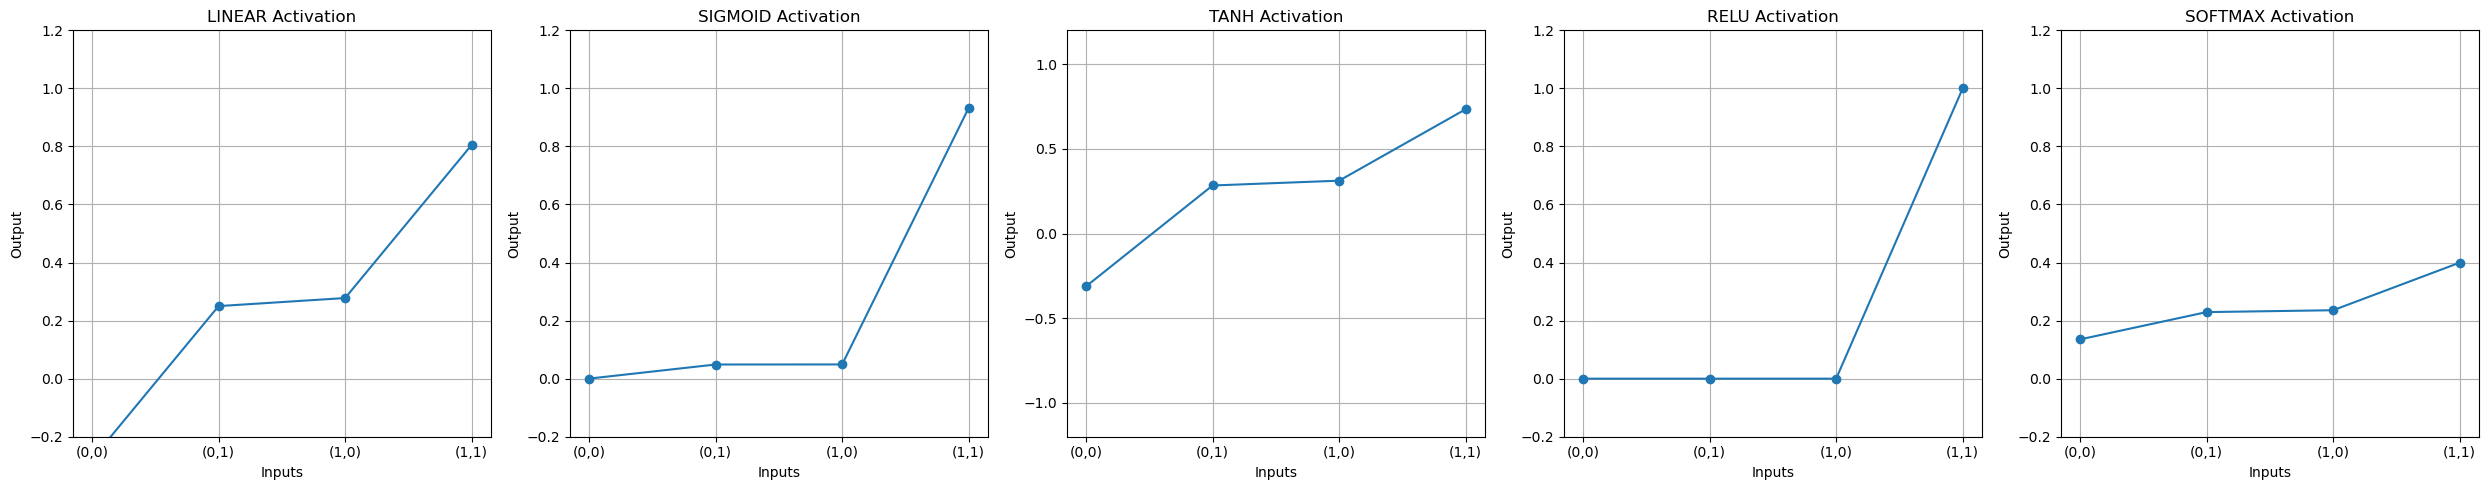

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax_all(outputs):
    e_x = np.exp(outputs - np.max(outputs))
    return e_x / e_x.sum()

class Perceptron:
    def __init__(self, input_size, activation='identity', learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation_name = activation

        if activation == 'linear':
            self.activation = linear
        elif activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'tanh':
            self.activation = tanh
        elif activation == 'relu':
            self.activation = relu
        elif activation == 'softmax':
            self.activation = None  
        else:
            raise ValueError("Unsupported activation function")

    def predict(self, x):
        x = np.insert(x, 0, 1) 
        z = np.dot(self.weights, x)
        if self.activation_name != 'softmax':
            return self.activation(z)
        else:
            return z

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                xi_aug = np.insert(xi, 0, 1) 
                z = np.dot(self.weights, xi_aug)
                output = self.activation(z) if self.activation_name != 'softmax' else z
                error = target - output
                self.weights += self.learning_rate * error * xi_aug


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1]) 

input_labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
x_pos = range(len(input_labels))


activations = ['linear', 'sigmoid', 'tanh', 'relu', 'softmax']

# Prepare plots
fig, axs = plt.subplots(1, len(activations), figsize=(5 * len(activations), 5))

for i, activation_function in enumerate(activations):
    perceptron = Perceptron(input_size=2, activation=activation_function, learning_rate=0.1, epochs=1000)
    perceptron.train(X, y)

    raw_outputs = [perceptron.predict(xi) for xi in X]

    if activation_function == 'softmax':
        outputs = softmax_all(np.array(raw_outputs))
    else:
        outputs = raw_outputs

    print(f"\n=== Activation Function: {activation_function.upper()} ===")
    for xi, output in zip(X, outputs):
        print(f"Input: {xi}, Output: {output:.4f}")

    axs[i].plot(x_pos, outputs, marker='o', linestyle='-', color='tab:blue')
    axs[i].set_title(f"{activation_function.upper()} Activation")
    axs[i].set_xticks(x_pos)
    axs[i].set_xticklabels(input_labels)
    axs[i].set_ylim([-0.2, 1.2] if activation_function != 'tanh' else [-1.2, 1.2])
    axs[i].set_xlabel("Inputs")
    axs[i].set_ylabel("Output")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

